In [ ]:

#
# EMRA 2020/2021 Lecture 1 complementary notebook
#
#                   HIDING A STAR
#

In [ ]:
# In this notebook you will be able to change the wavelength of observation of a star behind a cloud. 
# These notebooks should also be useful for showing you how to make nice plots for your project reports

In [5]:

#
# Libraries -- don't worry about this, it just gives us ready made tools for things like plotting
#

import numpy as np                         # a bunch of useful stuff
import matplotlib.pyplot as plt            # plotting 
from scipy.interpolate import interp1d     # for interpolation


Optical depth is τ =  1.0115403760000001


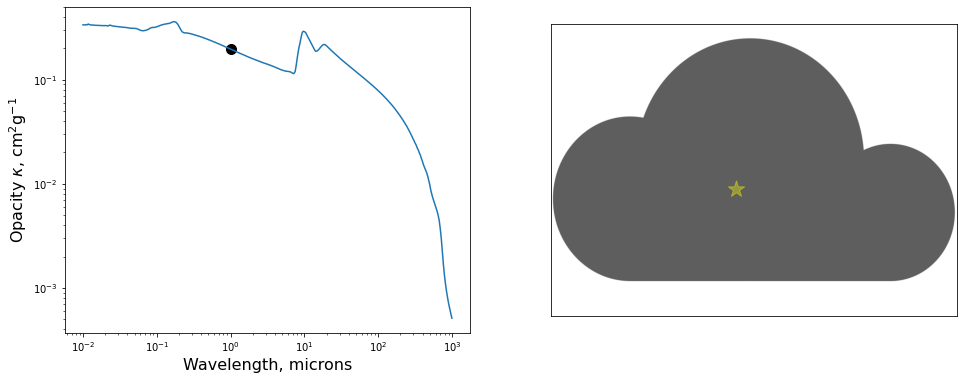

In [6]:
#
# Here you can specify your input values
#

#Wavelength of observation (in microns)

lambdaObs = 1.0

#thickness of cloud (in parseces)

CloudThickness = 10.0

#Density of cloud (hydrogen atoms per cubic metre)
CloudDensity = 1.e10


#
#

opacityFile="./albedo.dat"

#load the data from the file. I'm skipping the first two rows of the file as they are just text, not data
opacityData=np.loadtxt(opacityFile, skiprows=2)

#The units are in cm^2/g, so convert to the SI units that we use in this course
opacityData[:,2] = opacityData[:,2]*1.e3/1.e4 #1.e3 converts /g to /kg and 1./1.e4 converts cm^2 to m^2

#Interpolate over the opacity data to find out what the opacity is for the wavelength of observation specified
f = interp1d(opacityData[:,0], opacityData[:,2])
kappa=f(lambdaObs)

mHydrogen = 1.67e-27       # mass of a single hydrogen atom
parsecInMetres = 3.08e16   # 1 parsec, in metres

#work out the optical depth 
tau = kappa * CloudDensity * mHydrogen * CloudThickness * parsecInMetres

print("Optical depth is \u03C4 = ", tau)

#And adjust the transparency of the star based on how optically thick/thin the cloud is
StarAlpha = 1.0*np.exp(-tau)

#pull a cloud image from the internet
f="./Cloud.png"
cloud = plt.imread(f)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.loglog(opacityData[:,0], opacityData[:,2])           #plot the opacity data
ax1.scatter(lambdaObs, kappa, color="black", s=100)    #plot the point we have chosen
ax1.set_ylabel("Opacity $\kappa$, cm$^2$g$^{-1}$", fontsize=16)
ax1.set_xlabel("Wavelength, microns", fontsize=16)
ax2.set_xlim(1,986)
ax2.set_ylim(708,1)
ax2.set_xticks([]) 
ax2.set_yticks([]) 
ax2.scatter(450,400, marker='*', color="yellow", s=300, alpha=StarAlpha)
ax2.imshow(cloud)
plt.show()

